In [107]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [108]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [109]:
num_features = 4
num_classes = 6
seed = 42
x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = num_features,
                            centers = num_classes,
                            cluster_std=1.5,
                            random_state=seed)
x_tensor = torch.from_numpy(x_blob).type(torch.float)
y_tensor = torch.from_numpy(y_blob).type(torch.int)

In [104]:
len(x_blob[:, 1])

1000

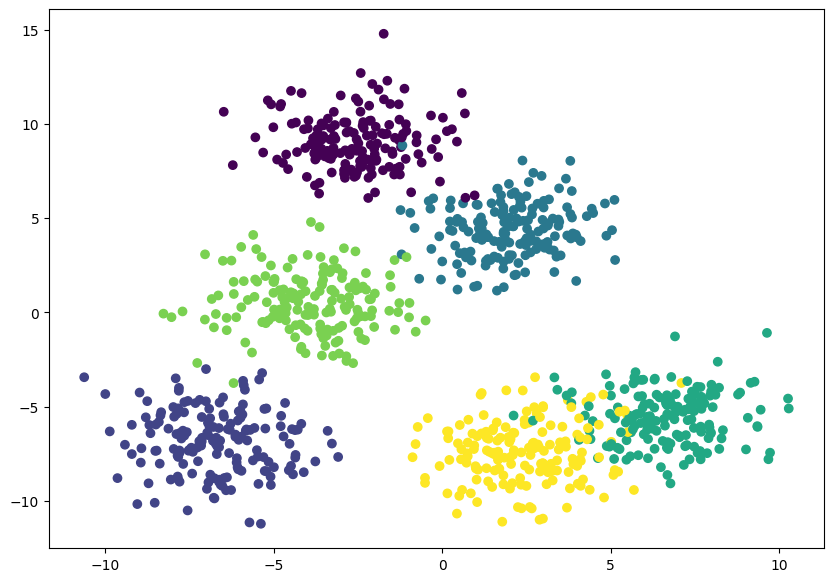

In [110]:
plt.figure(figsize= (10,7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c = y_blob)

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor,
                                                    test_size = 0.1,
                                                    random_state = 42)



In [112]:
y_train

tensor([2, 1, 5, 1, 0, 2, 2, 0, 3, 2, 0, 3, 2, 1, 4, 1, 4, 0, 5, 0, 0, 0, 5, 1,
        4, 4, 2, 1, 3, 5, 2, 3, 5, 2, 0, 2, 0, 1, 0, 2, 5, 3, 0, 1, 3, 1, 3, 3,
        5, 2, 4, 2, 0, 2, 5, 3, 4, 2, 1, 1, 1, 1, 3, 5, 1, 4, 0, 0, 1, 0, 5, 1,
        3, 3, 4, 2, 3, 5, 4, 1, 5, 3, 2, 5, 3, 1, 5, 5, 3, 2, 1, 2, 5, 3, 4, 5,
        5, 2, 5, 2, 0, 2, 0, 0, 0, 5, 0, 4, 1, 5, 5, 2, 1, 4, 1, 4, 1, 4, 3, 3,
        1, 5, 3, 1, 4, 1, 4, 1, 5, 4, 2, 3, 4, 0, 3, 3, 5, 1, 2, 5, 0, 3, 1, 2,
        3, 1, 1, 4, 5, 3, 2, 3, 3, 4, 5, 3, 5, 3, 1, 4, 4, 3, 2, 2, 1, 1, 2, 0,
        0, 2, 0, 2, 2, 5, 4, 0, 4, 3, 2, 4, 3, 1, 4, 0, 0, 4, 4, 3, 2, 2, 2, 0,
        3, 1, 0, 4, 0, 4, 2, 1, 3, 4, 1, 5, 2, 2, 0, 4, 3, 0, 1, 1, 1, 5, 4, 2,
        1, 4, 3, 0, 0, 1, 0, 1, 1, 3, 3, 0, 2, 4, 5, 4, 5, 4, 3, 3, 4, 0, 2, 2,
        5, 4, 1, 5, 4, 4, 4, 4, 0, 1, 3, 5, 5, 4, 5, 4, 0, 3, 0, 5, 5, 1, 3, 0,
        2, 1, 0, 2, 3, 1, 4, 1, 5, 3, 0, 1, 2, 0, 4, 2, 5, 2, 3, 2, 2, 0, 4, 3,
        5, 2, 4, 1, 2, 1, 5, 4, 4, 5, 2,

In [122]:
class BlobClassfier(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer_stack = nn.Sequential (
    nn.Linear(in_features = num_features, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features = 20, out_features = num_classes)
    )

  def forward(self, input):
    return self.linear_layer_stack(input)

In [123]:
model = BlobClassfier()
model.to(device)

BlobClassfier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=6, bias=True)
  )
)

In [124]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [ ]:
x_train.to(device)
y_train.to(device)
x_test.to(device)
y_train.to(device)

In [125]:
model.eval()
with torch.inference_mode():
  logits = model(x_train.to(device))


In [126]:
logits

tensor([[-0.7452,  0.5737, -0.3632,  0.4130,  1.0751, -0.4027],
        [-0.4356,  0.6632,  0.4133, -0.3626,  0.0044,  0.4881],
        [-0.6247,  0.5857, -0.2295, -0.1521, -0.1815, -0.2167],
        ...,
        [-0.5595,  0.5047, -0.1861, -0.0562, -0.1350, -0.1826],
        [-0.9812,  0.5056, -0.5824,  0.0714, -0.2343, -0.5905],
        [ 0.3366, -0.0637,  0.9001, -0.1393,  0.0383, -1.0046]])

In [127]:
loss_fn(logits, y_train.long())

tensor(1.8642)

In [ ]:
y_train

In [ ]:
probabilities = torch.softmax(logits, dim = 1)
torch.argmax(probabilities, dim = 1)

In [53]:
prediction = torch.argmax(probabilities, dim = 1)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
#We're creating the training loop here
epochs = 1000
x_train, y_train = x_train.to(device), y_train.to(device)
for i in range(epochs):

  #switching to train modey
  model.train()

  #forward pass
  y_logits = model(x_train)
  y_probs = torch.softmax(y_logits, dim = 1)
  #y_pred = torch.argmax(y_probs, dim = 1)

  #calculating the loss
  loss = loss_fn(y_logits, y_train.long())
  #accuaracy = accuracy_score(y_train, y_pred)

  #setting the optimizers accumalated gradients to 0.
  optimizer.zero_grad()

  #performing backpropagation
  loss.backward()
  optimizer.step()

  #testing
  model.eval()
  with torch.inference_mode():
    if i % 10 == 0:
      test_logits = model(x_test)
      test_probs = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_probs, dim = 1)
      test_loss = loss_fn(test_logits, y_test.long())
      test_acc = accuracy_score(y_test, test_pred)
      print("epoch %d........:: test_loss: %f.....:: accuracy: %f" % (i, test_loss, test_acc))

epoch 0........:: test_loss: 1.881319.....:: accuracy: 0.160000
epoch 10........:: test_loss: 1.555034.....:: accuracy: 0.330000
epoch 20........:: test_loss: 1.330451.....:: accuracy: 0.670000
epoch 30........:: test_loss: 1.165462.....:: accuracy: 0.700000
epoch 40........:: test_loss: 1.024773.....:: accuracy: 0.710000
epoch 50........:: test_loss: 0.905634.....:: accuracy: 0.760000
epoch 60........:: test_loss: 0.803899.....:: accuracy: 0.770000
epoch 70........:: test_loss: 0.717681.....:: accuracy: 0.800000
epoch 80........:: test_loss: 0.644830.....:: accuracy: 0.850000
epoch 90........:: test_loss: 0.582569.....:: accuracy: 0.890000
epoch 100........:: test_loss: 0.528516.....:: accuracy: 0.910000
epoch 110........:: test_loss: 0.480783.....:: accuracy: 0.920000
epoch 120........:: test_loss: 0.438353.....:: accuracy: 0.940000
epoch 130........:: test_loss: 0.400239.....:: accuracy: 0.950000
epoch 140........:: test_loss: 0.365825.....:: accuracy: 0.960000
epoch 150........:: t

In [37]:
y_train = y_train.unsqueeze(dim = 0)

In [ ]:
y_train